# Import

In [1]:
import os 
import sys
import pandas as pd

In [7]:
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\ML and DS Files\Kifiya AI\Kaim-week-2\notebooks
c:\ML and DS Files\Kifiya AI\Kaim-week-2


In [9]:
from importlib import reload
import scripts.data_loader, scripts.clean_and_transform, scripts.analysis_1, scripts.visualization
reload(scripts.data_loader)
reload(scripts.clean_and_transform)
reload(scripts.analysis_1)
reload(scripts.visualization)

<module 'scripts.visualization' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-2\\scripts\\visualization.py'>

In [10]:
from scripts.data_loader import DataLoader
from scripts.clean_and_transform import DropNullRows, NullValueFiller, DropUndefined
from scripts.analysis_1 import UserSessionAggregator, DataDescriber, VariableTransformer, MetricsAnalyzer, DispersionAnalyzer, PCAAnalyzer, HandsetAnalysis
from scripts.visualization import UnivariateAnalyzer, BivariateAnalyzer, CorrelationAnalyzer

#  Load data

In [11]:
file_path = r"C:\ML and DS Files\Kifiya AI\Kaim-week-2\Week 2 data\Data\Copy of Week2_challenge_data_source(CSV).csv"
loader = DataLoader(file_path)
data = loader.load_data()

Data successfully loaded from C:\ML and DS Files\Kifiya AI\Kaim-week-2\Week 2 data\Data\Copy of Week2_challenge_data_source(CSV).csv


In [128]:
data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [129]:
data.shape

(150001, 55)

In [13]:

num_undefined = data['Handset Type'].isin(['undefined']).sum()

print(f"Number of 'undefined' values: {num_undefined}")
percentage_undefined = (num_undefined / len(data)) * 100

print(f"Percentage of 'undefined' values: {percentage_undefined:.2f}%")

Number of 'undefined' values: 8987
Percentage of 'undefined' values: 5.99%


In [131]:
# Drop  undefined values from Handset Type
drop_undefined = DropUndefined(data)
data = drop_undefined.DeleteUndefined(column='Handset Type', value='undefined')

Sucessfully droped undefined columns


In [14]:
num_undefined = data['Handset Type'].isin(['undefined']).sum()

print(f"Number of 'undefined' values: {num_undefined}")
percentage_undefined = (num_undefined / len(data)) * 100

print(f"Percentage of 'undefined' values: {percentage_undefined:.2f}%")

Number of 'undefined' values: 8987
Percentage of 'undefined' values: 5.99%


In [132]:
# drop null rows for the follwing columns
# Bearer Id, Start, End, IMSI, MSISDN/Number, IMEI,Last Location Name, Handset Manufacturer, Handset Type
col_1 = ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
dropper = DropNullRows(columns_to_check=col_1)

# Drop rows where the specified column has null values
data = dropper.drop_if_null(data)

Sucessfuly dropped null rows from ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


In [133]:
data.shape

(139454, 55)

In [134]:
null_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
           'DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
           'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
            'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
            'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
            'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


#  Numerical null values are filled based on the outlier and normal distribution

In [ ]:
# Initialize the NullValueFiller class
filler = NullValueFiller(data, null_columns)
    
# Fill null values based on mean/median decision
filler.fill_nulls()


In [136]:
null_counts = data.isnull().sum()
print(null_counts)

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [137]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [138]:
analyzer = HandsetAnalysis(data)

In [139]:
# Identify the top 10 handsets
print("Top 10 Handsets:")
top_10_handsets = analyzer.get_top_n('Handset Type', 10)
print(top_10_handsets)

Top 10 Handsets:
                   Handset Type  Count
0              Huawei B528S-23A  19724
1       Apple iPhone 6S (A1688)   9391
2        Apple iPhone 6 (A1586)   8991
3        Apple iPhone 7 (A1778)   6274
4       Apple iPhone Se (A1723)   5165
5        Apple iPhone 8 (A1905)   4977
6       Apple iPhone Xr (A2105)   4555
7  Samsung Galaxy S8 (Sm-G950F)   4459
8        Apple iPhone X (A1901)   3805
9    Samsung Galaxy A5 Sm-A520F   3699


In [140]:
# Identify the top 3 handset manufacturers
print("\nTop 3 Handset Manufacturers:")
top_3_manufacturers = analyzer.get_top_n('Handset Manufacturer', 3)
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
  Handset Manufacturer  Count
0                Apple  59304
1              Samsung  40393
2               Huawei  34269


In [141]:
# Identify the top 5 handsets per top 3 manufacturers
# Task 3: Identify the top 5 handsets per top 3 manufacturers
print("\nTop 5 Handsets Per Top 3 Manufacturers:")
top_5_per_top_3_manufacturers = analyzer.get_top_n_per_top_k_groups('Handset Manufacturer', 'Handset Type', 5, 3)
print(top_5_per_top_3_manufacturers)


Top 5 Handsets Per Top 3 Manufacturers:
   Handset Manufacturer                         level_1  Count
0                 Apple         Apple iPhone 6S (A1688)   9391
1                 Apple          Apple iPhone 6 (A1586)   8991
2                 Apple          Apple iPhone 7 (A1778)   6274
3                 Apple         Apple iPhone Se (A1723)   5165
4                 Apple          Apple iPhone 8 (A1905)   4977
5                Huawei                Huawei B528S-23A  19724
6                Huawei                    Huawei E5180   2073
7                Huawei  Huawei P20 Lite Huawei Nova 3E   2011
8                Huawei                      Huawei P20   1475
9                Huawei                  Huawei Y6 2018    987
10              Samsung    Samsung Galaxy S8 (Sm-G950F)   4459
11              Samsung      Samsung Galaxy A5 Sm-A520F   3699
12              Samsung     Samsung Galaxy J5 (Sm-J530)   3674
13              Samsung     Samsung Galaxy J3 (Sm-J330)   3454
14            

## Task 1.1  Aggrigation

In [142]:
# Instantiate the class
aggregator = UserSessionAggregator(data)

# Perform aggregation by IMSI
aggrigated = aggregator.aggregate_per_user(user_column='IMSI')

# View results
aggrigated.head(3)

,IMSI,xdr_sessions,total_session_duration,total_dl_data,total_ul_data,total_social_media_data,total_google_data,total_email_data,total_youtube_data,total_netflix_data,total_gaming_data,total_other_data,total_application_data_volume
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1500145.0,5985089.0,2518425.0,18980320.0,21621336.0,28092282.0,389159720.0,467857317.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,668596.0,8572779.0,842279.0,9839889.0,10340908.0,164563605.0,467678100.0,662506156.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,3073697.0,603691.0,3076735.0,5556563.0,15305361.0,3760934.0,500044526.0,531421507.0


In [143]:
aggrigated.shape

(99714, 13)

#### variable discription

In [144]:
# Describe variables
describer = DataDescriber(aggrigated)
variable_description = describer.describe_variables()
print(variable_description)

                         Variable DataType  \
0                            IMSI  float64   
1                    xdr_sessions    int64   
2          total_session_duration  float64   
3                   total_dl_data  float64   
4                   total_ul_data  float64   
5         total_social_media_data  float64   
6               total_google_data  float64   
7                total_email_data  float64   
8              total_youtube_data  float64   
9              total_netflix_data  float64   
10              total_gaming_data  float64   
11               total_other_data  float64   
12  total_application_data_volume  float64   

                                      Description  
0            Bearer Id: Unique session identifier  
1                       Start: Session start time  
2                           End: Session end time  
3     Dur. (ms): Session duration in milliseconds  
4                           IMSI: User identifier  
5         Total DL (Bytes): Total downloade

#### 

#### Segmentation

In [145]:
# Perform user segmentation and compute total data per decile
transformer = VariableTransformer(aggrigated)
decile_data = transformer.segment_users()
print(decile_data)

  decile_class  total_users  total_dl_data  total_ul_data  total_data_dl_ul
0     Decile 1         9972   4.663302e+12   4.195924e+11      5.082894e+12
1     Decile 2         9971   5.236451e+12   4.722042e+11      5.708655e+12
2     Decile 3         9999   5.591368e+12   5.084570e+11      6.099825e+12
3     Decile 4        11840   5.420223e+12   4.901690e+11      5.910392e+12
4     Decile 5         8075   4.123312e+12   3.742690e+11      4.497581e+12
5     Decile 6         9971   5.522381e+12   4.992300e+11      6.021611e+12
6     Decile 7         9972   5.252360e+12   4.722628e+11      5.724623e+12
7     Decile 8         9971   6.698017e+12   6.107207e+11      7.308738e+12
8     Decile 9         9971   8.033070e+12   7.254369e+11      8.758507e+12
9    Decile 10         9972   1.282607e+13   1.161720e+12      1.398779e+13


c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\analysis_1.py:139: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Parameters:


#### Analyze basic metrics

In [146]:
# Analyze metrics
analyzer = MetricsAnalyzer(aggrigated)
basic_metrics = analyzer.analyze_metrics()
print(basic_metrics["metrics"])
print(basic_metrics["explanation"])

{'mean': {'IMSI': 208201559019860.3, 'xdr_sessions': 1.3985398238963436, 'total_session_duration': 145018.6125117837, 'total_dl_data': 635483024.8862046, 'total_ul_data': 57505081.69323265, 'total_social_media_data': 2510974.9446617328, 'total_google_data': 8042869.868313376, 'total_email_data': 2505379.247688389, 'total_youtube_data': 16269007.842820467, 'total_netflix_data': 16264737.424243337, 'total_gaming_data': 589890055.5584773, 'total_other_data': 589323853.1136751, 'total_application_data_volume': 1224806877.9998796}, 'median': {'IMSI': 208201546167194.5, 'xdr_sessions': 1.0, 'total_session_duration': 101675.0, 'total_dl_data': 571416324.0, 'total_ul_data': 46881978.0, 'total_social_media_data': 2273279.0, 'total_google_data': 7275992.5, 'total_email_data': 2270144.5, 'total_youtube_data': 14648956.0, 'total_netflix_data': 14669022.0, 'total_gaming_data': 533493082.5, 'total_other_data': 531326763.5, 'total_application_data_volume': 1035018120.5}, 'std': {'IMSI': 18577849440.7

#### Dispersion analyzer

In [147]:
# Initialize the analyzer
analyzer = DispersionAnalyzer(aggrigated)

# Compute dispersion metrics
dispersion_metrics = analyzer.compute_dispersion()
print("Dispersion Metrics:\n", dispersion_metrics)

# Provide interpretation
interpretation = analyzer.interpret_dispersion(dispersion_metrics)
print("\nInterpretation:\n", interpretation)

Dispersion Metrics:
                                       Range           IQR      Variance  \
Variable                                                                  
IMSI                           4.205059e+12  7.615958e+08  3.451365e+20   
xdr_sessions                   1.700000e+01  1.000000e+00  6.553010e-01   
total_session_duration         1.854661e+07  1.017745e+05  3.347149e+10   
total_dl_data                  8.147916e+09  4.938178e+08  2.175019e+17   
total_ul_data                  7.267105e+08  2.977277e+07  1.280238e+15   
total_social_media_data        4.274382e+07  2.091811e+06  3.579478e+12   
total_google_data              1.161062e+08  6.643620e+06  3.709897e+13   
total_email_data               3.360711e+07  2.068468e+06  3.617149e+12   
total_youtube_data             2.378830e+08  1.352616e+07  1.529276e+14   
total_netflix_data             1.994792e+08  1.356449e+07  1.528356e+14   
total_gaming_data              7.622033e+09  4.890377e+08  1.986828e+17   
tota

#### Graphical analysis

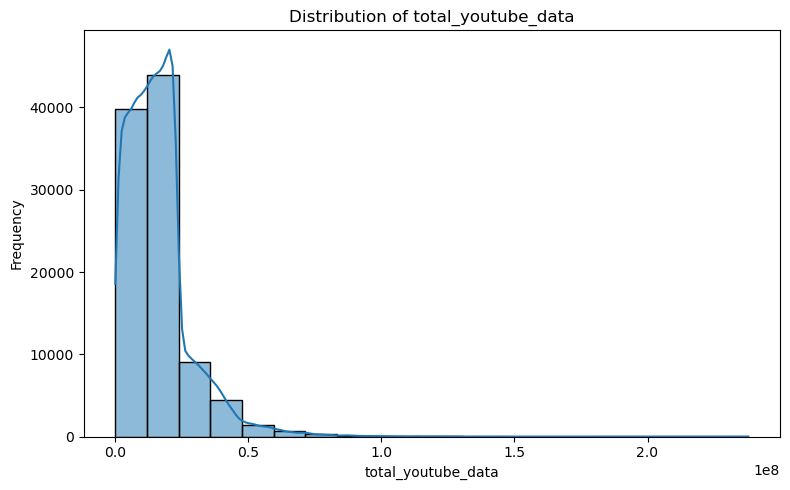

In [148]:
uni_analyzer = UnivariateAnalyzer(aggrigated)
uni_analyzer.plot_variable(column='total_youtube_data')

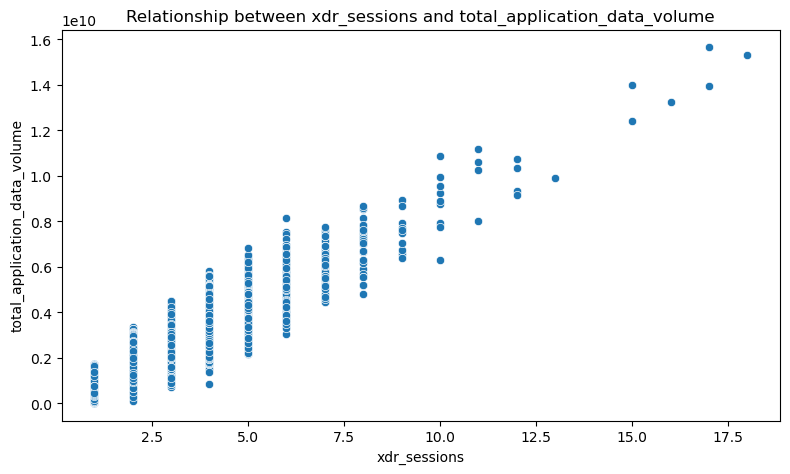

In [149]:
# Bivariate Analysis
bi_analyzer = BivariateAnalyzer(aggrigated)
bi_analyzer.plot_relationship(column_x='xdr_sessions', column_y='total_application_data_volume')

#### Correlation Analysis

In [150]:
aggrigated.columns

Index(['IMSI', 'xdr_sessions', 'total_session_duration', 'total_dl_data',
       'total_ul_data', 'total_social_media_data', 'total_google_data',
       'total_email_data', 'total_youtube_data', 'total_netflix_data',
       'total_gaming_data', 'total_other_data',
       'total_application_data_volume'],
      dtype='object')

In [151]:
corr_columns = ['IMSI', 'xdr_sessions', 'total_session_duration', 'total_dl_data',
       'total_ul_data', 'total_social_media_data', 'total_google_data',
       'total_email_data', 'total_youtube_data', 'total_netflix_data',
       'total_gaming_data', 'total_other_data',
       'total_application_data_volume']

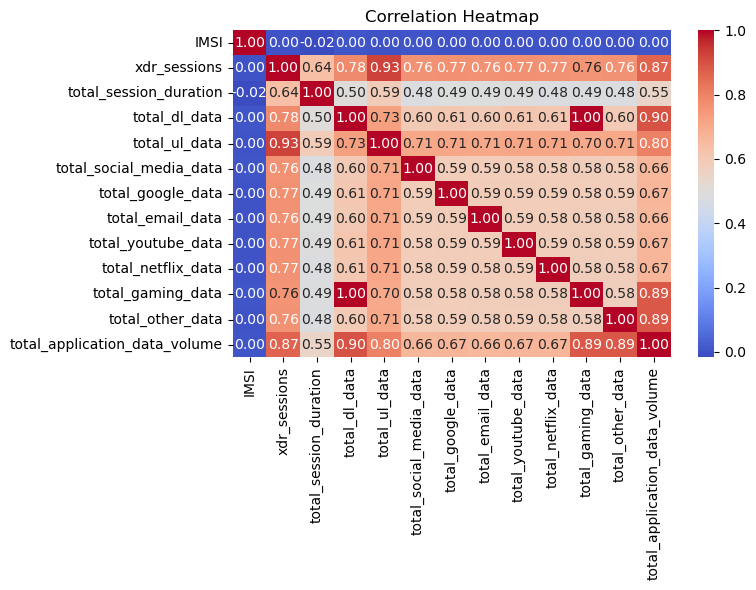

In [152]:
# Correlation Analysis
corr_analyzer = CorrelationAnalyzer(aggrigated)
correlation_matrix = corr_analyzer.compute_correlation_matrix(corr_columns)
corr_analyzer.plot_correlation_heatmap(correlation_matrix)

#### Principal component analysis

In [153]:
# PCA
pca_analyzer = PCAAnalyzer(aggrigated)
pca_results = pca_analyzer.perform_pca(corr_columns, n_components=2)
print("PCA Results:\n", pca_results)

Explained Variance Ratios: [0.63401047 0.07700445]
Total Explained Variance: 0.71
PCA Results:
             PC1         PC2
0     -0.535913 -223.484545
1     -1.130061 -221.648919
2     -1.814091   -0.119368
3     -0.937220   -0.096236
4      2.407564   -0.153760
...         ...         ...
99709 -1.786235    0.443274
99710 -1.120341    0.470754
99711 -0.628870    0.431066
99712 -1.511963    0.431685
99713 -0.824093    2.773135

[99714 rows x 2 columns]


'''
Here are four key insights from the PCA results:

1. **Dominance of the First Principal Component (PC1)**:  
   The first principal component (PC1) accounts for **63.37% of the variance**, indicating that it captures the majority of the variability in the dataset. This suggests that a single underlying factor heavily influences the data distribution.

2. **Low Contribution from the Second Principal Component (PC2)**:  
   The second principal component (PC2) explains only **7.70% of the variance**, demonstrating that it contributes much less to the overall variability. This indicates that PC2 captures nuances or secondary patterns in the data.

3. **Cumulative Explained Variance**:  
   Together, the first two components explain **71.0% of the total variance**, meaning a significant proportion of the data’s variability can be summarized using just these two dimensions. However, nearly **29% of the variance** remains unexplained, possibly requiring additional components for further analysis.

4. **Potential for Dimensionality Reduction**:  
   By retaining only two components, we achieve a **substantial reduction in dimensionality** while preserving most of the critical information. This simplification is useful for visualizing relationships between variables and reducing computational complexity in downstream tasks.
'''